In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model

In [3]:
num_labels = 7
batch_size = 128
epochs = 250
width, height = 48, 48

data = pd.read_csv("/content/drive/My Drive/Datasets/fer2013.csv")
pixels = data['pixels'].tolist()

faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split()]
    face = np.asarray(face).reshape(width, height)

    face = face / 255.0
    faces.append(face.astype('float32'))

faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)

emotions = pd.get_dummies(data['emotion']).values

X_train = faces[:28622]
X_test = faces[28622:]
y_train = emotions[:28622]
y_test = emotions[28622:]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/250
195/195 [==============================] - 59s 229ms/step - loss: 1.8832 - accuracy: 0.2368 - val_loss: 1.8095 - val_accuracy: 0.2493 - lr: 0.0100
Epoch 2/250
195/195 [==============================] - 41s 207ms/step - loss: 1.8078 - accuracy: 0.2487 - val_loss: 1.7922 - val_accuracy: 0.2493 - lr: 0.0100
Epoch 3/250
195/195 [==============================] - 40s 207ms/step - loss: 1.8015 - accuracy: 0.2507 - val_loss: 1.7831 - val_accuracy: 0.2493 - lr: 0.0100
Epoch 4/250
195/195 [==============================] - 40s 206ms/step - loss: 1.7978 - accuracy: 0.2497 - val_loss: 1.7866 - val_accuracy: 0.2493 - lr: 0.0100
Epoch 5/250
195/195 [==============================] - 40s 206ms/step - loss: 1.7982 - accuracy: 0.2480 - val_loss: 1.7820 - val_accuracy: 0.2459 - lr: 0.0100
Epoch 6/250
195/195 [==============================] - 40s 206ms/step - loss: 1.7946 - accuracy: 0.2498 - val_loss: 1.7856 - val_accuracy: 0.2493 - lr: 0.0100
Epoch 7/250
195/195 [=========================

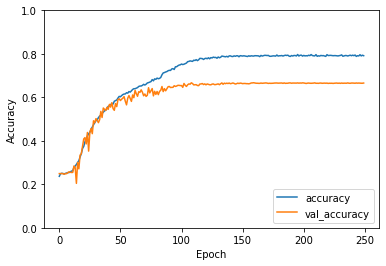

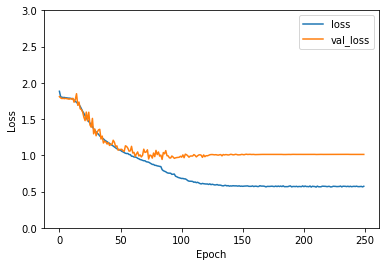

228/228 - 5s - loss: 0.9871 - accuracy: 0.6789 - 5s/epoch - 21ms/step


In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(width, height, 1), kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(1024, activation= 'relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(Dropout(0.4))
model.add(Dense(512, activation= 'relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(Dropout(0.3))
model.add(Dense(128, activation= 'relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=int(random.random()*100))))
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.0001, patience=10, verbose=1, min_lr=0.000001)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
    )


datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
          steps_per_epoch=len(X_train) / batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks = [lr_reducer])


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='upper right')
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
model.save('/content/drive/My Drive/Datasets/fer_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
196/196 [==============================] - 43s 213ms/step - loss: 0.5201 - accuracy: 0.8116 - val_loss: 0.9829 - val_accuracy: 0.6694 - lr: 3.0000e-05
Epoch 2/100
196/196 [==============================] - 39s 201ms/step - loss: 0.5181 - accuracy: 0.8117 - val_loss: 0.9818 - val_accuracy: 0.6666 - lr: 3.0000e-05
Epoch 3/100
196/196 [==============================] - 39s 201ms/step - loss: 0.5160 - accuracy: 0.8102 - val_loss: 0.9818 - val_accuracy: 0.6669 - lr: 3.0000e-05
Epoch 4/100
196/196 [==============================] - 39s 200ms/step - loss: 0.5157 - accuracy: 0.8116 - val_loss: 0.9814 - val_accuracy: 0.6666 - lr: 3.0000e-05
Epoch 5/100
196/196 [==============================] - 39s 200ms/step - loss: 0.5170 - accuracy: 0.8101 - val_loss: 0.9806 - val_accuracy: 0.6674 - lr: 3.0000e-05
Epoch 6/100
196/196 [==============================] - 39s 200ms/step - loss: 0.5158 - accuracy: 0.8114 - val_loss: 0.9825 - val_accuracy: 0.6674 - lr: 3.0000e-05
Epoch 7/100
196/196 [=

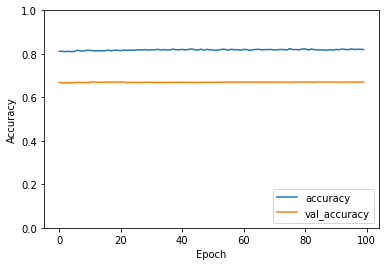

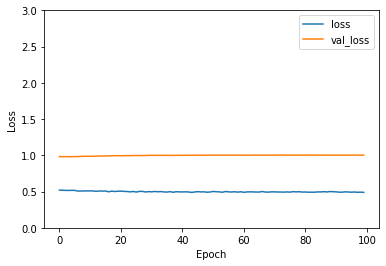

57/57 - 5s - loss: 0.9849 - accuracy: 0.6866 - 5s/epoch - 86ms/step


[0.9849497079849243, 0.6865794658660889]

In [ ]:
#load and finetune the pre-trained model
model2 = load_model('/content/drive/My Drive/Datasets/fer_model.h5')

model2.compile(optimizer=tf.keras.optimizers.SGD(lr=0.00003, decay=1e-6, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

lr_reducer = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=6, verbose=1, min_delta=0.00001, min_lr=0.0000001)

history2 = model2.fit(X_train, y_train, batch_size=batch_size, epochs=100, validation_data=(X_val, y_val), callbacks=[lr_reducer])

plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='upper right')
plt.show()

model2.save('/content/drive/My Drive/Datasets/fer_model_finetuned.h5')
model2.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)

In [ ]:
img_csv = pd.read_csv("/content/drive/My Drive/Datasets/FER2013/verification/happy/Training_99966265.csv")

sample_faces = []
for pixel_sequence in img_csv:
    face = [int(pixel) for pixel in pixel_sequence.split()]
    face = np.asarray(face).reshape(width, height)

    face = face / 255.0
    sample_faces.append(face.astype('float32'))

sample_faces = np.asarray(sample_faces)
sample_faces = np.expand_dims(sample_faces, -1)

model = load_model('/content/drive/My Drive/Datasets/fer_model_finetuned.h5')

predictions = model.predict(sample_faces, verbose=0)

In [5]:
print(predictions)

[[5.3655134e-05 3.7051481e-07 5.0255016e-04 9.8520839e-01 2.1991576e-04
  4.6059871e-03 9.4091669e-03]]


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']